<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 2</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$16^{th}$ October, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [41]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'nquiro2s'
member2 = 'slatou2s'

# Build a spam classifier using Naive Bayes[100 points]

In [42]:
#Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#Include your other headers here
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#nltk.download()

## Step 1:- Load your data[10 points]
#### There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). Load the dataset using pandas.

In [43]:
#Load your dataset in this cell
def loadData(nameFile):
    if '.csv' in nameFile:
        if 'Train' in nameFile:
            file = pd.read_csv(nameFile)
            file.columns=['type','text']
            return file
        else:
            file = pd.read_csv(nameFile)
            file.columns=['text']
            return file
    else:
        test = []
        for line in open(nameFile,'r').readlines():
            columns = []
            for col in line.split('	'):
                columns.append(col)
            test.append(columns)
        return pd.DataFrame(test,columns=['type','text'])

## Step 2:- Preprocess the data[20 points]
#### Analyse the data, for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words (Research how to do this [Hint:- see how the texts are pre-processed in Natural Language Processing]) use any libraries that you feel comfortable. Now Combine them into one big data set for the training.

In [53]:
#Pre-process the data
def preProcessing(dataset_brut):
    stop_words = set(stopwords.words('english'))
    for i,row in dataset_brut.iterrows():
        dataset_brut['text'][i] = re.sub('[,;.!?*@#$€£+-/]', '', dataset_brut['text'][i])
        filtered_sentence = []
        for word in dataset_brut['text'][i].split(' '):
            if word not in stop_words:
                filtered_sentence.append(word)
        dataset_brut['text'][i] =  filtered_sentence 
    return dataset_brut


## Step 3:- Visualise the data[20 points]
#### Try to visualize and analyse the data such as before and after pre processing, number of ham/spam etc. Analyse as many verticals you can, feel free to use graphical libraries like seaborn.

Data befor pre-processing.
      type                                               text
0      ham  Hope you are having a good week. Just checking in
1      ham                            K..give back my thanks.
2      ham        Am also doing in cbe only. But have to pay.
3     spam  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4     spam  okmail: Dear Dave this is your final notice to...
...    ...                                                ...
5554   ham  You are a great role model. You are giving so ...
5555   ham  Awesome, I remember the last time we got someb...
5556  spam  If you don't, your prize will go to another cu...
5557  spam  SMS. ac JSco: Energy is high, but u may not kn...
5558   ham                    Shall call now dear having food

[5559 rows x 2 columns]
Data after pre-processing.
      type                                               text
0      ham                 [Hope, good, week, Just, checking]
1      ham                              [Kgive, back,

Text(0.5, 1.0, 'Number of ham and spam')

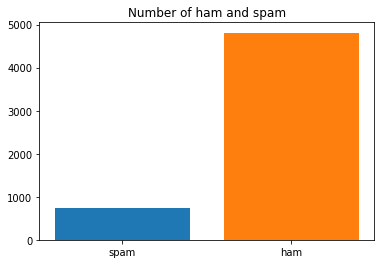

In [60]:
#Visualise the data
brut = loadData('TrainDataset1.csv')
print('Data befor pre-processing.')
print(brut)
net = preProcessing(brut)
print('Data after pre-processing.')
print(net)
#your code here
print('Number of Ham & Spam')
print(net['type'].value_counts())
ham, spam = net['type'].value_counts()
plt.bar('spam',spam)
plt.bar('ham',ham)
plt.title('Number of ham and spam')

## Step 4:- Build, train and validate the classifer, [20 points]

### Training on supervised data (labelled data)

#### Use the data in order to build your own Naive Bayes classifier (You can either use existing Naive Bayes from sklearn or build your own). Build the classifier, train it and then validate. Provide your result in confusion matrix (use heatmap from seaborn) along with the classification report from sklearn. Validation accuracy should be around 99%.

Rows in test set: (1668,)
Rows in train set: (3891,)
classifier accuracy 98.86%
Confusion Matrix :
[[1459    5]
 [  14  190]]
Accuracy Score : 0.9886091127098321
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1464
           1       0.97      0.93      0.95       204

    accuracy                           0.99      1668
   macro avg       0.98      0.96      0.97      1668
weighted avg       0.99      0.99      0.99      1668

F-Measure: 0.952


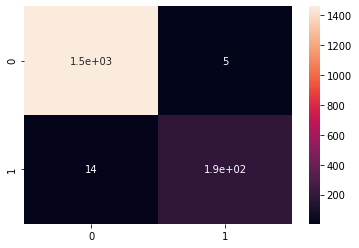

In [61]:

def Training_on_supervised_data(net): 
    net['type'] = net['type'].apply(lambda x: 1 if x == 'spam' else 0)
    x_train, x_test, y_train, y_test = train_test_split(net['text'], net['type'], test_size = 0.3, random_state = 0)   

    print('Rows in test set: ' + str(x_test.shape))
    print('Rows in train set: ' + str(x_train.shape))

    document_train = [''.join(str(item)) for item in x_train]
    document_test = [''.join(str(item)) for item in x_test]

    vectorizer = CountVectorizer()
    features_train_transformed = vectorizer.fit_transform(document_train) #gives tf idf vector for x_train
    features_test_transformed  = vectorizer.transform(document_test) #gives tf idf vector for x_test

    classifier = MultinomialNB()
    classifier.fit(features_train_transformed, y_train)
    print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

    predicted = classifier.predict(features_test_transformed)
    actual = y_test.tolist()
    results = confusion_matrix(actual, predicted)
    print('Confusion Matrix :')
    print(results)
    print ('Accuracy Score :',accuracy_score(actual, predicted))
    print ('Report : ')
    print (classification_report(actual, predicted) )
    score_2 = f1_score(actual, predicted, average = 'binary')
    print('F-Measure: %.3f' % score_2)
    sns.heatmap(results, annot=True)
    
Training_on_supervised_data(net)


## Step 5:- Test the classifier[10 points]

### Supervised classification[5 points] 

#### Test your Classifier using  the SMSSpamCollection.txt dataset provide a heatmap and classification report. Test accuracy should be around 99%.


Number of Ham & Spam
ham     4827
spam     747
Name: type, dtype: int64
Rows in test set: (1673,)
Rows in train set: (3901,)
classifier accuracy 98.33%
Confusion Matrix :
[[1425    6]
 [  22  220]]
Accuracy Score : 0.9832635983263598
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1431
           1       0.97      0.91      0.94       242

    accuracy                           0.98      1673
   macro avg       0.98      0.95      0.97      1673
weighted avg       0.98      0.98      0.98      1673

F-Measure: 0.940


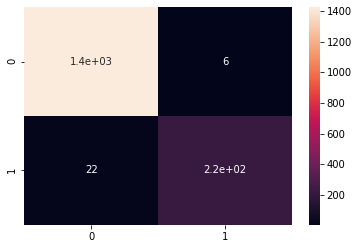

In [99]:
# Test the classifier

brut = loadData('SMSSpamCollection.txt')
net = preProcessing(brut)

print('Number of Ham & Spam')
print(net['type'].value_counts())
ham, spam = net['type'].value_counts()

Training_on_supervised_data(net)

### Unsupervised classification[5 points] 

#### Test your Classifier using  the TestDataset.csv dataset. This dataset is not labelled so kindly predict the labels and visualise it[5 points].

In [122]:

brut = loadData('TestDataset.csv')
net = preProcessing(brut)

document_test = [''.join(str(item)) for item in net['text']]
features_test_transformed  = vectorizer.transform(document_test) #gives tf idf vector for x_test

predicted = classifier.predict(features_test_transformed)
#actual = y_test.tolist()

print('Number of Ham & Spam')
print('Ham :',np.count_nonzero(predicted == 0))
print('Spam :',np.count_nonzero(predicted == 1))


Number of Ham & Spam
Ham : 1016
Spam : 99


## Step 6:- Cheat the classifier[20 points]

#### Try to cheat the classifier by adding "good words" to the end of test dataset(TestDataset.csv) e.g:- Oh! no share Market has fallen down by $100,000 due to Corona outbreak... try mixing up spam and ham words see how the classifier works. Output the results in a good format to validate your work[15 points]  

In [128]:
# Cheat the classifier
#your code here

brut = loadData('TestDataset1_cheat.csv')
net = preProcessing(brut)

document_test = [''.join(str(item)) for item in net['text']]
features_test_transformed  = vectorizer.transform(document_test) #gives tf idf vector for x_test

predicted2 = classifier.predict(features_test_transformed)
#actual = y_test.tolist()

print('Number of Ham & Spam')
print('Ham :',np.count_nonzero(predicted == 0), '> cheat : ', np.count_nonzero(predicted2 == 0))
print('Spam :',np.count_nonzero(predicted == 1), '> cheat : ', np.count_nonzero(predicted2 == 1))


Number of Ham & Spam
Ham : 1016 > cheat :  1018
Spam : 99 > cheat :  97


#### Write your analysis of how you intended to cheat the classifier and how it performed in few words (provide your inference)[5 points]

**Give your expalanation here**  
I added "good words" into spam lines.

### Help

<a href="https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering" target="_top">Spam Filtering using Naive Bayes</a><br>
<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_top">Seaborn Heatmap</a><br>
<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_top">Sklearn Naive Bayes</a><br>
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html" target="_top">Sklearn Metrics</a><br>
<a href="https://pandas.pydata.org/docs/getting_started/index.html#getting-started" target="_top">Intro to Pandas</a>